In [1]:
# 1. Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [2]:
# 2. Ambil dataset MNIST dari OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(np.uint8)  # y diubah ke integer

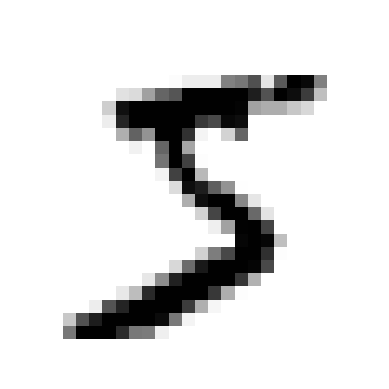

In [3]:
# 3. Lihat salah satu gambar
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)  # Ubah vektor jadi matriks 28x28

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [4]:
# 4. Bagi data menjadi training dan testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [5]:
# 5. Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 6. Latih model klasifikasi dengan Stochastic Gradient Descent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(random_state=42)

In [7]:
# 7. Evaluasi awal dengan data test
y_pred = sgd_clf.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print("Akurasi di data test:", acc)

Akurasi di data test: 0.8933


In [8]:
# 8. Cross-validation (lebih akurat)
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("Akurasi rata-rata CV:", cv_scores.mean())

Akurasi rata-rata CV: 0.8970333333333333


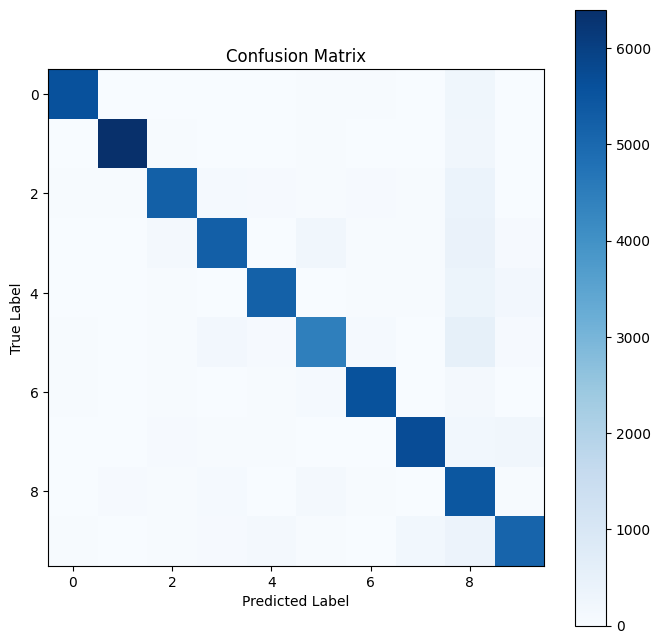

In [9]:
# 9. Confusion Matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 8))
plt.imshow(conf_mx, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

In [10]:
# 10. Hitung Precision, Recall, dan F1 Score
prec = precision_score(y_train, y_train_pred, average="macro")
rec = recall_score(y_train, y_train_pred, average="macro")
f1 = f1_score(y_train, y_train_pred, average="macro")

print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Precision: 0.9058677582614747
Recall: 0.8958098878393358
F1 Score: 0.8980936936376714


### 💬 Penjelasan:

* **MNIST** dimuat dari `fetch_openml()` karena Scikit-Learn v1.2+ tidak lagi menyertakan `fetch_mnist()`.
* **SGDClassifier** dipilih karena mendukung training cepat di dataset besar.
* **StandardScaler** sangat penting untuk model berbasis gradien seperti SGD.
* **Confusion matrix** divisualisasikan agar mudah mengenali pola error antar digit.
* **Macro average** digunakan karena semua kelas dianggap setara pentingnya.